# To find the best fit line for given data using Linear Regression

##Assignment on Linear Regression:
The following table shows the results of a recently conducted study on the correlation of the number of hours spent driving with the risk of developing acute backache. Find the equation of the best fit line for this data.

Number of hours spent driving (x) | Risk Score on a scale of 0-100 (y)
--- | ---
10 | 95
9 | 80
2 | 10
15 | 50
10 | 45
16 | 98
11 | 38
16 | 93

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# Function to plot the given data
def plotData(X, y, x_label='driving_hours', y_label='risk_score'):
    plt.figure(figsize=(6,6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(X,y)
    return plt

In [ ]:
# Function to plot the regression line along with the given data
def plotRegressionLine(X, y, y_pred, x_label='driving_hours', y_label='risk_score'):
    plt = plotData(X, y, x_label, y_label)
    plt.plot(X, y_pred, color='red', linewidth=3)
    plt.show()

###Evaluating the model - Coefficient of Determination (R2 Score)

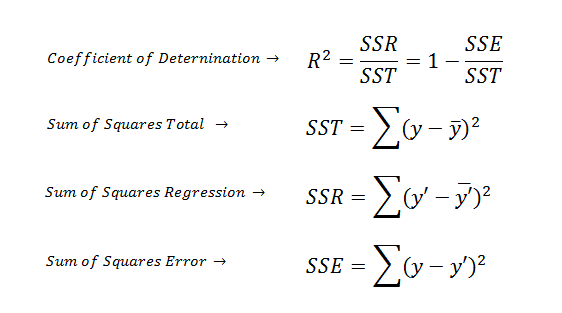

In [ ]:
# Function to calculate R2 score
def calcR2Score(X, y, y_pred):
    y_mean = y.mean()
    SStot = sum((y-y_mean)**2)
    SSres = sum((y-y_pred)**2)
    r2_score = 1-(SSres/SStot)
    return r2_score

Pearson’s Correlation Coefficient is a linear correlation coefficient that returns a value of between -1 and +1. A -1 means there is a strong negative correlation and +1 means that there is a strong positive correlation. A 0 means that there is no correlation (this is also called zero correlation

In [ ]:
# Function to calculate Pearson's Correlation Coefficient
def correlationCoef(X,y): 
    X_mean = X.mean()
    y_mean = y.mean()
    num = sum((X-X_mean)*(y-y_mean))
    den = (sum((X-X_mean)**2)*sum((y-y_mean)**2))**0.5
    coef = num/den
    return coef

In [ ]:
data = {
    'driving_hours': [10, 9, 2, 15, 10, 16, 11, 16], 
    'risk_score':[95, 80, 10, 50, 45, 98, 38, 93]
} 
df = pd.DataFrame.from_dict(data) 

In [ ]:
df.head()

,driving_hours,risk_score
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45


In [ ]:
X = np.array(df['driving_hours'])
y = np.array(df['risk_score'])

In [ ]:
correlationCoef(X,y)

0.6611314653759117

<module 'matplotlib.pyplot' from 'C:\\Users\\Megh Khaire\\Anaconda3\\envs\\Python\\lib\\site-packages\\matplotlib\\pyplot.py'>

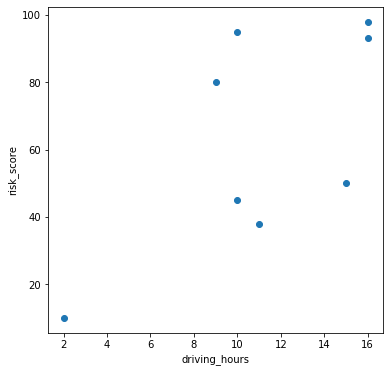

In [ ]:
plotData(X, y)

###Fitting the Regression Line

#### $\widehat{Y}$ = $b_{0}$ + $b_{1}$x

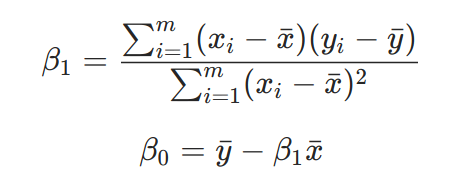

In [ ]:
# Function to calculate coefficients of the line
def calcCoefficient(X,y):
    X_mean = X.mean()
    y_mean = y.mean()
    # Σ [ (xi – x)(yi – y) ] / Σ [ (xi – x)2]
    coef = (sum((X-X_mean)*(y-y_mean))/sum((X-X_mean)**2))
    intercept = y_mean - coef*X_mean
    return coef, intercept

Coefficient:  4.58789860997547
Intercept:  12.584627964022893
R2 score:  0.43709481451010035
Equation: Y = 4.58789860997547*X+12.584627964022893


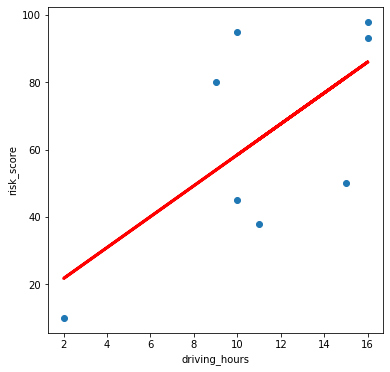

In [ ]:
W,W0 = calcCoefficient(X,y)
y_pred = W*X + W0
print("Coefficient: ",W)
print("Intercept: ",W0)
print("R2 score: ",calcR2Score(X, y, y_pred))
print(f"Equation: Y = {W}*X+{W0}")
plotRegressionLine(X, y, y_pred)

## Sklearn implementation
Using Sklearn's LinearRegression api for evaluating the given dataset

In [ ]:
X = np.array(X).reshape(-1,1)

Coefficient:  4.587898609975469
Intercept:  12.584627964022907
R2 score:  0.43709481451010035
Equation: Y = 4.587898609975469*X+12.584627964022907


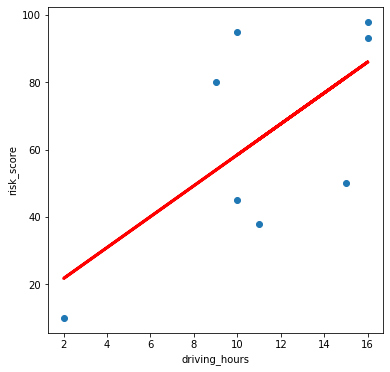

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print("Coefficient: ",model.coef_[0])
print("Intercept: ",model.intercept_)
print("R2 score: ",calcR2Score(X, y, y_pred))
print(f"Equation: Y = {model.coef_[0]}*X+{model.intercept_}")
plotRegressionLine(X, y, y_pred)